In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_CAN = pd.read_csv('../BDD/Canada/energy-canada.csv', sep=';')
energy_CHN = pd.read_csv('../BDD/energy.csv', sep=';')
energy_CHN = energy_CHN[energy_CHN.Code=='CHN']
energy_CHN.columns = ['Entity', 'Code', 'Year', 'Energy (TWh)']
energy_UK = pd.read_csv('../BDD/UK/primary-energy-consumption.csv', sep=';')
energy_FR= pd.read_csv('../BDD/France/energy-france.csv', sep=';')
energy_IT = pd.read_csv('../BDD/Italy/energy-italy.csv', sep=';')
energy_JPN = pd.read_csv('../BDD/Japan/energy-japan.csv', sep=';')
energy_NTH = pd.read_csv('../BDD/Netherlands/energy-netherlands.csv', sep=';')
energy_SPN = pd.read_csv('../BDD/Spain/energy-spain.csv', sep=';')
energy_UK = pd.read_csv('../BDD/UK/primary-energy-consumption.csv', sep=';')
energy_US = pd.read_csv('../BDD/USA/USA-1850-2008.csv', sep=';')
energy_WRD = pd.read_csv('../BDD/world-energy.csv', sep=';')

energy_US = pd.merge(energy_US, energy_WRD, on = ['Year'])
energy_UK = pd.merge(energy_UK, energy_WRD, on = ['Year'])
energy_SPN = pd.merge(energy_SPN, energy_WRD, on = ['Year'])
energy_NTH = pd.merge(energy_NTH, energy_WRD, on = ['Year'])
energy_JPN = pd.merge(energy_JPN, energy_WRD, on = ['Year'])
energy_IT = pd.merge(energy_IT, energy_WRD, on = ['Year'])
energy_FR = pd.merge(energy_FR, energy_WRD, on = ['Year'])
energy_CHN = pd.merge(energy_CHN, energy_WRD, on = ['Year'])
energy_CAN = pd.merge(energy_CAN, energy_WRD, on = ['Year'])

tables = [energy_FR, energy_IT, energy_CAN, energy_JPN, energy_NTH, energy_SPN, energy_UK, energy_US, energy_CHN]
noms = ['France', 'Italy', 'Canada', 'Japan', 'Netherlands', 'Spain', 'UK', 'US', 'China']
energy_UK.columns

Index(['Year', 'Energy (PetaJoules)', 'Energy (TWh)', 'Energy world (TWh)'], dtype='object')

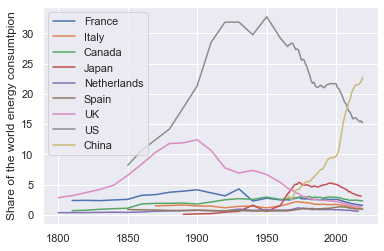

In [50]:
for i in range(9): 
    tab = tables[i]
    plt.plot(tab['Year'], tab['Energy (TWh)']/tab['Energy world (TWh)']*100, label = noms[i])
    plt.legend()
    plt.ylabel("Share of the world energy consumtpion")

In [77]:
codes= ['CAN', 'CHN', 'FRA', 'ITA', 'JPN', 'NLD', 'ESP', 'GBR', 'USA']
population = pd.read_csv('../BDD/population.csv', sep=',')
gdpc = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv', sep=',')
final = pd.merge(population, gdpc, on=['Year'])
for cod in codes : 
    tab = final[final.Code_x==final.Code_y]
    tab = tab[tab.Code_x==cod]
    pop = tab['Total population (Gapminder, HYDE & UN)']
    gdpc = tab['GDP per capita']
    gdp = gdp*pop
    year = tab['Year']

    new = final[final.Code_x==final.Code_y]
    new = new[new.Code_x=='OWID_WRL'] 
    new = pd.merge(tab, new, on=['Year'])
    new.head()
    popw = new['Total population (Gapminder, HYDE & UN)']
    gdpcw = new['GDP per capita']
    gdpw = gdp*pop
    
    plt.plot(year, gdp/gdpw*100*100)




KeyError: 'Total population (Gapminder, HYDE & UN)'

In [62]:
final

Index(['Entity_x', 'Code_x', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Entity_y', 'Code_y', 'GDP per capita', '145446-annotations'],
      dtype='object')